In [ ]:
## Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
## Installing Libraries-
# !pip install statsmodels
# !pip install pmdarima


## Processes the Dataset using EDA

In [ ]:
## Full Information about Data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 37.2+ MB


In [ ]:
## Load the Dataset
data = pd.read_csv('online_retail.csv', parse_dates = ['InvoiceDate'])
data.set_index('InvoiceDate', inplace = True)

In [ ]:
## Preview the First Few Rows
data.head()

,index,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


## Cheking And Filling Null Values

In [ ]:
## Preview the First Few Rows
print(data.isnull().sum())

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
## Filling Null Values
data['Description'].fillna(method = 'ffill', inplace=True)

<ipython-input-12-1b6f872ac126>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Description'].fillna(method = 'ffill', inplace=True)
<ipython-input-12-1b6f872ac126>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Description'].fillna(method = 'ffill', inplace=True)


In [ ]:
data['CustomerID'].fillna(data.groupby('Country')['CustomerID'].transform(lambda x: x.mode()[0] if not x.mode().empty else 0), inplace=True)


<ipython-input-13-d870069944fa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CustomerID'].fillna(data.groupby('Country')['CustomerID'].transform(lambda x: x.mode()[0] if not x.mode().empty else 0), inplace=True)


## Statical Data Analysis

In [ ]:
## Statistical Summary
print(data.describe())


              index       Quantity      UnitPrice     CustomerID
count  541909.00000  541909.000000  541909.000000  541909.000000
mean   270954.00000       9.552250       4.611114   15906.215184
std    156435.79785     218.081158      96.759853    1886.725790
min         0.00000  -80995.000000  -11062.060000       0.000000
25%    135477.00000       1.000000       1.250000   14352.000000
50%    270954.00000       3.000000       2.080000   16233.000000
75%    406431.00000      10.000000       4.130000   17841.000000
max    541908.00000   80995.000000   38970.000000   18287.000000


In [ ]:
## Unique Value Counts for categorical columns (like CustomerID and Country):

print(data['Country'].value_counts())
print(data['CustomerID'].nunique())


Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


## Data Vizualisation

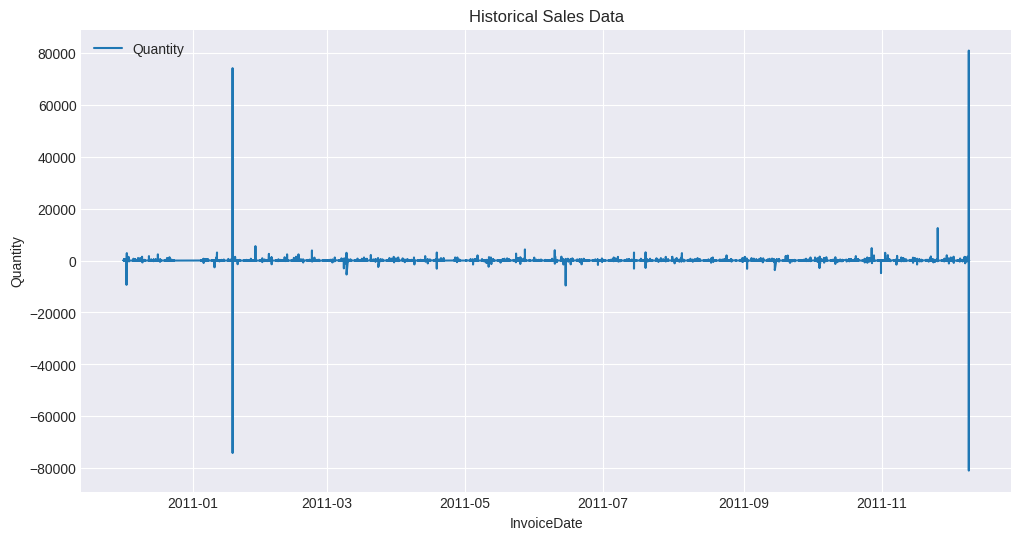

In [ ]:
## Plotting historical sales data to identify trends, seasonality, or anomalies.

plt.figure(figsize = (12,6))
plt.plot(data.index, data['Quantity'], label = 'Quantity')
plt.title('Historical Sales Data')
plt.xlabel('InvoiceDate')
plt.ylabel('Quantity')
plt.legend()
plt.show()


<ipython-input-18-4282e722a594>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data['Quantity'].resample('M').sum()


<Axes: title={'center': 'Monthly Sales Volume'}, xlabel='InvoiceDate'>

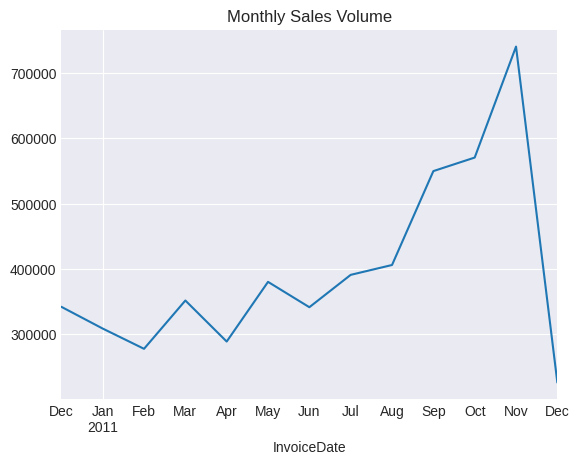

In [ ]:
## To see sales trends, resample data by month.
monthly_sales = data['Quantity'].resample('M').sum()
monthly_sales.plot(title='Monthly Sales Volume')


<Axes: title={'center': 'Top 10 Countries by Sales'}, xlabel='Country'>

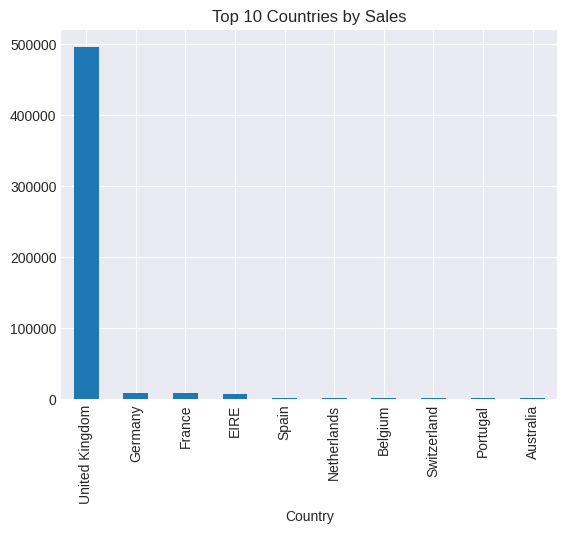

In [ ]:
## Top 10 Countries by Sales

top_countries = data['Country'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top 10 Countries by Sales')


<Axes: title={'center': 'Top 10 Products'}, xlabel='Description'>

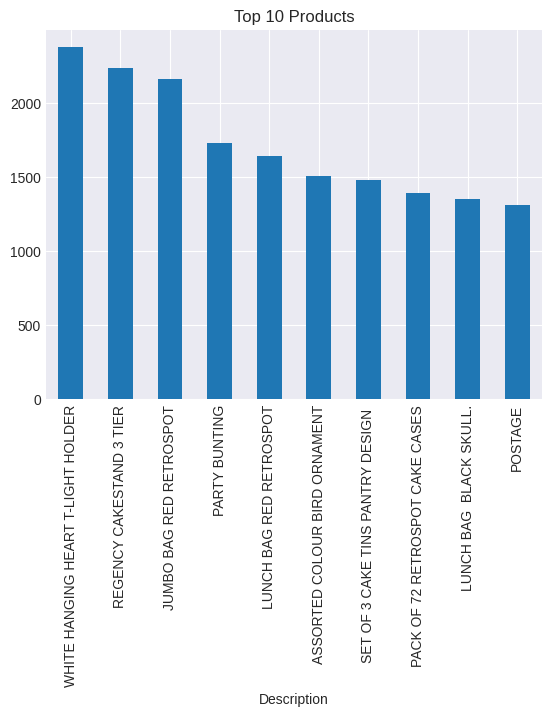

In [ ]:
## Most Popular Products
top_products = data['Description'].value_counts().head(10)
top_products.plot(kind='bar', title='Top 10 Products')


# Decomposing the Time Series




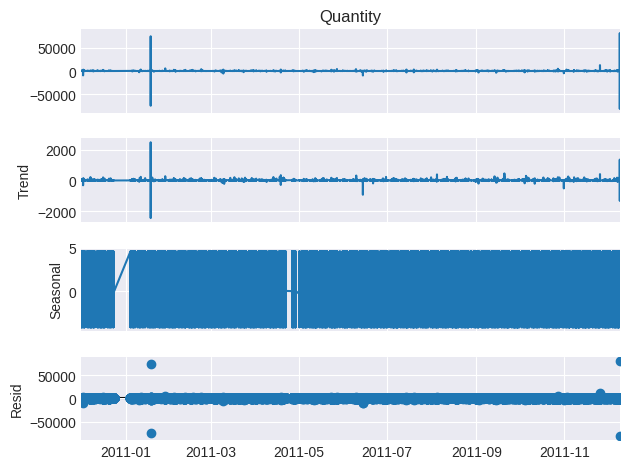

In [ ]:
## Use statsmodels for Decomposition
data_cleaned = data['Quantity'].dropna()
decomposed = seasonal_decompose(data_cleaned, model='additive', period=30)  # Adjust period as needed
decomposed.plot()
plt.show()




## Building a Forecasting Model

In [ ]:
# Check for NaN values
print("NaN values in Quantity before filling:", data['Quantity'].isnull().sum())

# Fill missing values using forward fill and backward fill
data_filled = data['Quantity'].ffill().bfill()  # First forward fill, then backward fill

# Check if any NaN values remain
print("NaN values in Quantity after filling:", data_filled.isnull().sum())


NaN values in Quantity before filling: 0
NaN values in Quantity after filling: 0


In [ ]:
# Check for infinite values
print("Infinite values in Quantity:", np.isinf(data_filled).sum())


Infinite values in Quantity: 0


In [ ]:
# If there are still NaN or infinite values, drop them
data_filled = data_filled.dropna()

# using interpolation to fill missing values
# data_filled = data['Quantity'].interpolate()

# Final check before fitting the model
print("NaN values in Quantity after cleaning:", data_filled.isnull().sum())
print("Infinite values in Quantity after cleaning:", np.isinf(data_filled).sum())


NaN values in Quantity after cleaning: 0
Infinite values in Quantity after cleaning: 0


In [ ]:
# Example of downsampling and fitting the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Preparing features (like month and year) from the datetime index
data = data.reset_index()  # Reset index to access the Date as a column
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year

X = data[['month', 'year']]  # Feature set
y = data['Quantity']         # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Print or plot predictions as needed
print(predictions)





[ 9.67657892 10.41344008  9.64708483 ...  9.9460971  12.66580903
 11.53375816]


## Making Predictions and Visualize


In [ ]:
## Generating Forecasts:

# Generating future dates and prepare for forecasting
future_dates = pd.date_range(start='2024-10-01', periods=12, freq='ME')
future_features = pd.DataFrame({
    'month': future_dates.month,
    'year': future_dates.year
})

# Make forecasts
forecast = model.predict(future_features)

## Plotting the Forecasted Data



<ipython-input-46-1469370b08f3>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  historical_data = data.set_index('InvoiceDate').resample('M').sum()['Quantity']


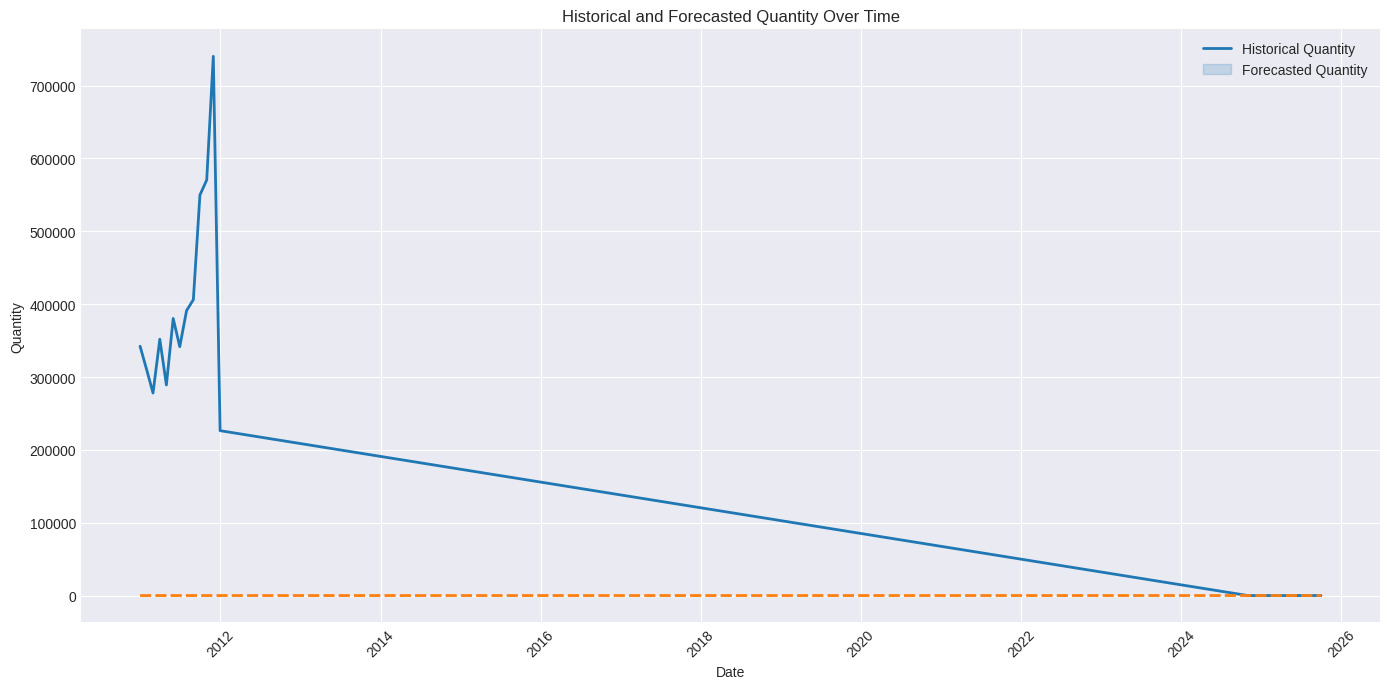

In [ ]:
# Let's creating a plot to visualize historical and forecasted data

# Convert 'InvoiceDate' to datetime if it isn't already
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Prepare a DataFrame for historical data plotting
historical_data = data.set_index('InvoiceDate').resample('ME').sum()['Quantity']  # Sum up monthly data

# Create a DataFrame for forecasted data
forecast_df = pd.DataFrame({
    'InvoiceDate': future_dates,
    'Forecasted_Quantity': forecast
}).set_index('InvoiceDate')

# Plotting the historical data
plt.figure(figsize=(14, 7))
sns.lineplot(x=historical_data.index, y=historical_data, label='Historical Quantity', color='blue', linewidth=2)

# Plotting the forecasted data
sns.lineplot(x=forecast_df.index, y=forecast_df['Forecasted_Quantity'], label='Forecasted Quantity', color='red', linestyle='--', linewidth=2)

# Enhancing the visualization
plt.title("Historical and Forecasted Quantity Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend(loc="upper left")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

